In [1]:
#@title Everything not mine is copyright 2020 Google LLC. Double-click here for full information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
 
# Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
# which is a derivative work from original NIST datasets. 
# MNIST dataset is made available under the terms of the 
# Creative Commons Attribution-Share Alike 3.0 license.

This Notebook is heavily modified from the MLCC programming project with single-digit images here:
https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/multi-class_classification_with_MNIST.ipynb

In [2]:
# load some standard utilities.
%tensorflow_version 2.x
#from __future__ import absolute_import, division, print_function, unicode_literals
 
import random as rd
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import time
 
print("Loaded modules.")

Loaded modules.


In [3]:
tf.__version__

'2.3.0'

In [4]:
# load the dataset.
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
kaggle = pd.read_csv('https://github.com/davidabelin/kaggle-files/raw/main/digit-recognizer/test.csv')
k_train = pd.read_csv('https://github.com/davidabelin/kaggle-files/raw/main/digit-recognizer/train.csv')
k_answers = np.asarray(k_train['label'])
k_train = k_train.drop(columns=['label'])
k_train_norm = np.asarray(k_train/255.)

In [6]:
kaggle_norm = np.asarray(kaggle/255.)
x_train_norm = x_train/255.
x_test_norm = x_test/255.

## Create a deep neural net model and a convolutional neural network to compare

In [7]:
k_train_norm = k_train_norm.reshape(42000, 28, 28)
kaggle_norm = kaggle_norm.reshape(28000, 28, 28)
x_train_norm = x_train_norm.reshape(60000, 28, 28)
x_test_norm = x_test_norm.reshape(10000, 28, 28)

In [8]:
# SET UP A DEEP NEURAL NET 
 
def create_DNN(learning_rate):
    """Create and compile a deep neural net."""  
    # Define the kind of model to use.
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.1)) #avoid overfitting to train set
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=100, activation='softmax'))     
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy']) 
    return model 

In [9]:
 # SET UP A **CONVOLUTIONAL** NEURAL NET 
 
def create_CNN(learning_rate):
    """Create and compile a convolutional neural net."""  
    # Define the kind of model to use.
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, 6, activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.Conv2D(64, 4, activation='relu'))
    model.add(tf.keras.layers.Conv2D(128, 2, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=100, activation='softmax'))     
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy']) 
    return model

In [10]:
k_train_norm = k_train_norm.reshape(42000, 28, 28, 1)
kaggle_norm = kaggle_norm.reshape(28000, 28, 28, 1)
x_train_norm = x_train_norm.reshape(60000, 28, 28, 1)
x_test_norm = x_test_norm.reshape(10000, 28, 28, 1)

In [11]:
 # train on the training set with 10% held back for validation #
def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=None):

    history = model.fit(x=train_features, y=train_label, 
                        batch_size=batch_size,
                        epochs=epochs, shuffle=True, 
                        validation_split=validation_split)

    # Gather the model's metrics after each round of training
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist

In [27]:

print("\nfinished test set of 42000 - 4200 in about {} minutess\n".format((time.time()-batch_time)//60))


finished test set of 42000 - 4200 in about 30.0 minutess



In [12]:
# Train and evalate CNN
learning_rate = 0.001
epochs = 30
batch_size = 512
validation_split = 0.1
start_time = time.time()

convoluter = create_CNN(learning_rate)

# TRAIN X2:
for _ in range(2):
    #x_test_norm:
    epochs_CNN, hist_CNN = train_model(convoluter, x_test_norm, y_test, epochs, batch_size, validation_split)
    print("finished test set of 10000 - 1000 in {:.2} seconds".format(time.time()-start_time))
    batch_time = time.time()
    #x_train_norm:
    epochs_CNN, hist_CNN = train_model(convoluter, x_train_norm, y_train, epochs, batch_size, validation_split)
    print("finished train set of 60000 - 6000 in {:.2} seconds".format(time.time()-batch_time))
    batch_time = time.time()
    #k_train_norm:
    epochs_CNN, hist_CNN = train_model(convoluter, k_train_norm, k_answers, epochs, batch_size, validation_split)
    print("finished test set of 42000 - 4200 in {:.2} seconds".format(time.time()-batch_time))

print ("\nTotal time: {:.2} seconds".format(time.time()-start_time))


Epoch 1/30
18/18 [==============================] - 0s 24ms/step - loss: 1.7967 - accuracy: 0.5108 - val_loss: 0.6438 - val_accuracy: 0.8020
Epoch 2/30
18/18 [==============================] - 0s 12ms/step - loss: 0.4648 - accuracy: 0.8687 - val_loss: 0.4120 - val_accuracy: 0.8740
Epoch 3/30
18/18 [==============================] - 0s 12ms/step - loss: 0.3307 - accuracy: 0.9021 - val_loss: 0.3141 - val_accuracy: 0.9200
Epoch 4/30
18/18 [==============================] - 0s 12ms/step - loss: 0.2324 - accuracy: 0.9321 - val_loss: 0.2212 - val_accuracy: 0.9380
Epoch 5/30
18/18 [==============================] - 0s 12ms/step - loss: 0.1577 - accuracy: 0.9529 - val_loss: 0.1628 - val_accuracy: 0.9450
Epoch 6/30
18/18 [==============================] - 0s 12ms/step - loss: 0.1141 - accuracy: 0.9656 - val_loss: 0.1548 - val_accuracy: 0.9510
Epoch 7/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0842 - accuracy: 0.9737 - val_loss: 0.1033 - val_accuracy: 0.9630
Epoch 8/30
18

In [13]:
convoluter.evaluate(x=x_test_norm,y=y_test, batch_size=batch_size)

20/20 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 0.9984


[0.008643372915685177, 0.9983999729156494]

In [ ]:
# The adjustable "hyperparameters" for the model
dense_NN = create_DNN(learning_rate)
 
# TRAIN:
epochs_DNN, hist_DNN = train_model(dense_NN, x_train_norm, y_train, 
                                    epochs, batch_size, validation_split)
epochs_DNN, hist_DNN = train_model(dense_NN, k_train_norm, k_answers, 
                                    epochs, batch_size, validation_split)
epochs_DNN, hist_DNN = train_model(dense_NN, k_train_norm, k_answers, 
                                    epochs, batch_size, validation_split)

# EVALUATE AGAINST THE TEST SET:
print("\n Evaluate the new model against the test set:")
dense_NN.evaluate(x=x_test_norm, 
                  y=y_test, 
                  batch_size=batch_size)

In [ ]:
dense_NN.evaluate(x=x_train_norm, y=y_train, batch_size=batch_size)

In [45]:
dense_NN.evaluate(x=x_test_norm,y=y_test, batch_size=batch_size)

20/20 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9907


[0.043288663029670715, 0.9907000064849854]

In [19]:
def getKaggles():  
    kaggles = pd.DataFrame(columns=['ImageId','Label'])  
    predicts = convoluter.predict(kaggle_norm)
    for j in range(len(kaggle_norm)):
        probs = predicts[j] # one row of 10 probabilities 
        max_id = np.argmax(probs)   # index of top probability in row
        kaggles.at[j,'ImageId'] = j+1
        kaggles.at[j,'Label'] = max_id

    return kaggles
print("Loaded function getKaggles.")
print("Getting answers..." )

# LOAD UP ALL THE GUESSES (W/ PROBABILITES) FOR 
# EACH EXAMPLE IMAGE IN THE NORMALIZED TEST SET
kaggles = getKaggles()
kaggles

Loaded function getKaggles.
Getting answers...


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [20]:
kaggles.to_csv('submission.csv', columns=["ImageId","Label"], index=False) #

In [21]:
g = pd.read_csv('/content/submission.csv')

In [59]:
s1 = pd.read_csv('/content/submission1.csv', index_col="ImageId")#header=None, 

In [22]:
g

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


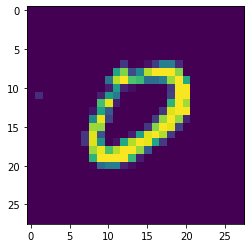

In [48]:
dig = kaggle.iloc[3]
dig = np.reshape(list(dig),(28,28))
plt.imshow(dig)

##Visualizations

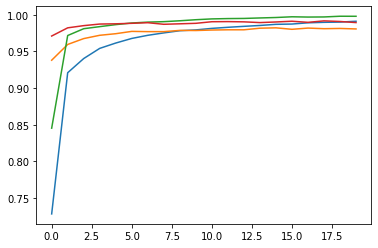

In [ ]:
# Plot a graph of the 'accuracy' metric vs. epochs:
plt.plot(range(epochs),hist_DNN["accuracy"])
plt.plot(range(epochs),hist_DNN["val_accuracy"])
plt.plot(range(epochs),hist_CNN["accuracy"])
plt.plot(range(epochs),hist_CNN["val_accuracy"])